In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/Microsoft_Stock.csv')
df.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [3]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [4]:
df = df.drop(columns=['High', 'Low', 'Open', 'Volume'])
df.tail()

,Date,Close
1506,3/25/2021 16:00:00,232.34
1507,3/26/2021 16:00:00,236.48
1508,3/29/2021 16:00:00,235.24
1509,3/30/2021 16:00:00,231.85
1510,3/31/2021 16:00:00,235.77


In [5]:
df["Close"] = (df["Close"] - df["Close"].mean()) / df["Close"].std()
df.tail()

,Date,Close
1506,3/25/2021 16:00:00,2.203048
1507,3/26/2021 16:00:00,2.276061
1508,3/29/2021 16:00:00,2.254193
1509,3/30/2021 16:00:00,2.194407
1510,3/31/2021 16:00:00,2.263540


Text(0.5, 1.0, 'Close average')

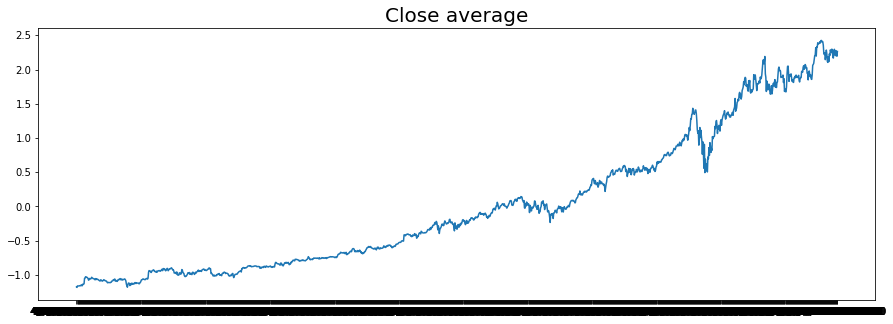

In [6]:
dates = df['Date'].values
volume  = df['Close'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, volume)
plt.title('Close average',
          fontsize=20)

In [7]:
from sklearn.model_selection import train_test_split
x_latih, x_test, y_latih, y_test = train_test_split(dates, volume, test_size=0.2, shuffle=False)

In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [20]:
train_set = windowed_dataset(y_latih, window_size=60, batch_size=10, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [21]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=200)

Epoch 1/200
115/115 [==============================] - 4s 10ms/step - loss: 0.2135 - mae: 0.5649
Epoch 2/200
115/115 [==============================] - 2s 12ms/step - loss: 0.1826 - mae: 0.5246
Epoch 3/200
115/115 [==============================] - 1s 9ms/step - loss: 0.1608 - mae: 0.4935
Epoch 4/200
115/115 [==============================] - 1s 9ms/step - loss: 0.1456 - mae: 0.4700
Epoch 5/200
115/115 [==============================] - 1s 9ms/step - loss: 0.1355 - mae: 0.4536
Epoch 6/200
115/115 [==============================] - 1s 9ms/step - loss: 0.1269 - mae: 0.4389
Epoch 7/200
115/115 [==============================] - 1s 9ms/step - loss: 0.1205 - mae: 0.4252
Epoch 8/200
115/115 [==============================] - 1s 9ms/step - loss: 0.1138 - mae: 0.4121
Epoch 9/200
115/115 [==============================] - 1s 9ms/step - loss: 0.1070 - mae: 0.3962
Epoch 10/200
115/115 [==============================] - 1s 9ms/step - loss: 0.1024 - mae: 0.3863
Epoch 11/200
115/115 [===============

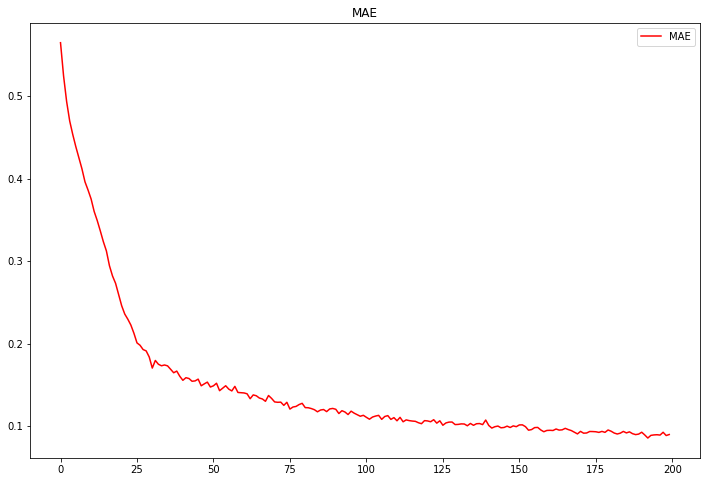

In [22]:
mae = history.history['mae']
epochs = range(len(mae))

plt.figure(figsize=(12,8))
plt.plot(epochs, mae, 'r', label='MAE')
plt.title('MAE')
plt.legend(loc=0)
plt.show()